In [ ]:
!pip install pybaseball

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.7/432.7 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 56.9 MB/s eta 0:00:00


In [ ]:
from pybaseball import statcast_pitcher
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
cease_2025 = statcast_pitcher(
    "2025-03-01",
    "2025-11-01",
    656302
)

cease_2025.head()


Gathering Player Data


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
0,SL,2025-10-01,91.6,-1.36,6.09,"Cease, Dylan",673548,656302,double,hit_into_play,...,1.0,2.46,0.14,0.14,49.7,13.773019,-13.479355,29.274143,37.631843,42.079009
1,SL,2025-10-01,90.2,-1.37,6.05,"Cease, Dylan",673548,656302,NaN,swinging_strike,...,1.0,2.52,-0.17,-0.17,47.7,23.891561,-42.072973,30.636979,40.117100,59.008404
2,KC,2025-10-01,82.4,-1.15,6.10,"Cease, Dylan",673548,656302,NaN,ball,...,1.0,4.47,-0.28,-0.28,57.7,NaN,NaN,NaN,NaN,NaN
3,FF,2025-10-01,99.7,-1.63,6.24,"Cease, Dylan",663656,656302,strikeout,swinging_strike,...,1.0,0.75,0.69,-0.69,50.3,10.330778,0.053765,28.813627,43.379038,23.469108
4,SL,2025-10-01,91.4,-1.52,6.11,"Cease, Dylan",663656,656302,NaN,swinging_strike,...,1.0,2.50,0.03,-0.03,49.2,24.750471,-18.080130,38.315660,29.944062,39.051579


In [ ]:
# quedarnos solo con pitcheos con ubicación válida
cease_2025 = cease_2025.dropna(subset=['plate_x', 'plate_z'])

# swings
swings_2025 = cease_2025[
    cease_2025['description'].isin([
        'swinging_strike',
        'swinging_strike_blocked',
        'foul',
        'foul_tip',
        'hit_into_play'
    ])
]

# whiffs
whiffs_2025 = swings_2025[
    swings_2025['description'].isin([
        'swinging_strike',
        'swinging_strike_blocked'
    ])
]


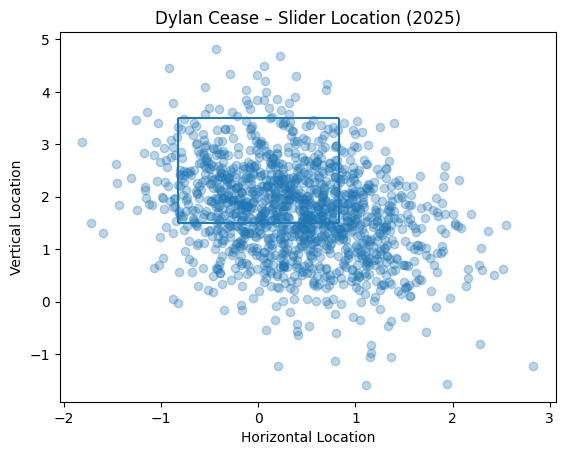

In [ ]:
sl_2025 = cease_2025[cease_2025['pitch_type'] == 'SL']

plt.figure()
plt.scatter(
    sl_2025['plate_x'],
    sl_2025['plate_z'],
    alpha=0.3
)

# zona de strike aproximada
plt.vlines([-0.83, 0.83], 1.5, 3.5)
plt.hlines([1.5, 3.5], -0.83, 0.83)

plt.title("Dylan Cease – Slider Location (2025)")
plt.xlabel("Horizontal Location")
plt.ylabel("Vertical Location")
plt.show()


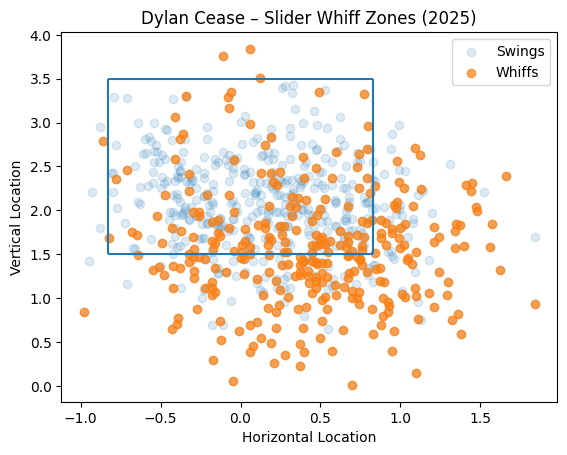

In [ ]:
# slider con swings
sl_swings_2025 = swings_2025[swings_2025['pitch_type'] == 'SL']

# slider whiffs
sl_whiffs_2025 = whiffs_2025[whiffs_2025['pitch_type'] == 'SL']

plt.figure()

# todos los swings (fondo)
plt.scatter(
    sl_swings_2025['plate_x'],
    sl_swings_2025['plate_z'],
    alpha=0.15,
    label='Swings'
)

# whiffs (encima)
plt.scatter(
    sl_whiffs_2025['plate_x'],
    sl_whiffs_2025['plate_z'],
    alpha=0.7,
    label='Whiffs'
)

# zona de strike
plt.vlines([-0.83, 0.83], 1.5, 3.5)
plt.hlines([1.5, 3.5], -0.83, 0.83)

plt.title("Dylan Cease – Slider Whiff Zones (2025)")
plt.xlabel("Horizontal Location")
plt.ylabel("Vertical Location")
plt.legend()
plt.show()


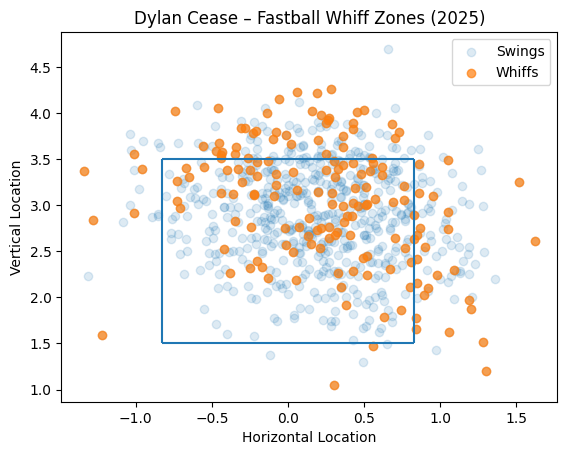

In [ ]:
ff_swings_2025 = swings_2025[swings_2025['pitch_type'] == 'FF']
ff_whiffs_2025 = whiffs_2025[whiffs_2025['pitch_type'] == 'FF']

plt.figure()

plt.scatter(
    ff_swings_2025['plate_x'],
    ff_swings_2025['plate_z'],
    alpha=0.15,
    label='Swings'
)

plt.scatter(
    ff_whiffs_2025['plate_x'],
    ff_whiffs_2025['plate_z'],
    alpha=0.7,
    label='Whiffs'
)

plt.vlines([-0.83, 0.83], 1.5, 3.5)
plt.hlines([1.5, 3.5], -0.83, 0.83)

plt.title("Dylan Cease – Fastball Whiff Zones (2025)")
plt.xlabel("Horizontal Location")
plt.ylabel("Vertical Location")
plt.legend()
plt.show()


In [ ]:
import os

os.makedirs("figures", exist_ok=True)


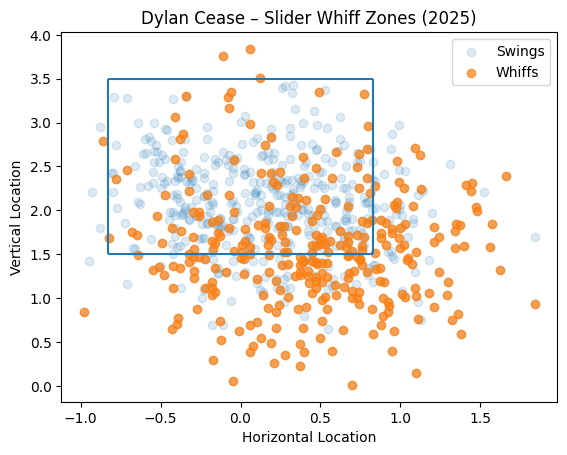

In [ ]:
plt.figure()

plt.scatter(
    sl_swings_2025['plate_x'],
    sl_swings_2025['plate_z'],
    alpha=0.15,
    label='Swings'
)

plt.scatter(
    sl_whiffs_2025['plate_x'],
    sl_whiffs_2025['plate_z'],
    alpha=0.7,
    label='Whiffs'
)

plt.vlines([-0.83, 0.83], 1.5, 3.5)
plt.hlines([1.5, 3.5], -0.83, 0.83)

plt.title("Dylan Cease – Slider Whiff Zones (2025)")
plt.xlabel("Horizontal Location")
plt.ylabel("Vertical Location")
plt.legend()

plt.savefig(
    "figures/zone_whiff_sl_2025.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


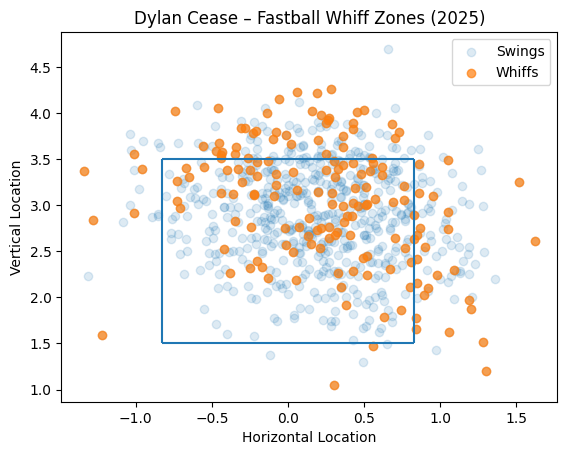

In [ ]:
plt.figure()

plt.scatter(
    ff_swings_2025['plate_x'],
    ff_swings_2025['plate_z'],
    alpha=0.15,
    label='Swings'
)

plt.scatter(
    ff_whiffs_2025['plate_x'],
    ff_whiffs_2025['plate_z'],
    alpha=0.7,
    label='Whiffs'
)

plt.vlines([-0.83, 0.83], 1.5, 3.5)
plt.hlines([1.5, 3.5], -0.83, 0.83)

plt.title("Dylan Cease – Fastball Whiff Zones (2025)")
plt.xlabel("Horizontal Location")
plt.ylabel("Vertical Location")
plt.legend()

plt.savefig(
    "figures/zone_whiff_ff_2025.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


In [ ]:
os.listdir("figures")


['zone_whiff_sl_2025.png', 'zone_whiff_ff_2025.png']